## Stocks Trading Strategies Analysis (Backtesting)

1. Select a basket of stocks and a given time period of doing the backtesting
2. Implement a few buy-and-hold trading strategies
3. Evaluate the performance of different strategies

## Disclaimer : 
I'm not recommending anyone to follow the strategies mentioned below, this whole notebook is just a toy.

### 1. First thing first, import necessary libraries, some may not be used though...

In [56]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance
import quandl 
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Get the stocks price data

In [57]:
def get_data(tickers, startdate, enddate):
    data = pdr.DataReader(tickers, 'yahoo', start=startdate, end=enddate)
    return data

faang = ['fb', 'amzn', 'aapl', 'nflx', 'goog']
hk = ['9988.hk', '0700.hk', '3690.hk', '0856.hk', '2318.hk']
diy = ['fb', 'aapl', 'goog', 'blk', 'jpm', 'gs', 'v', 'tsla', 'ibm']

tickers = diy # choose which basket of stocks to use in the backtesting
tickers = [x.upper() for x in tickers] # convert to uppercase
all_data = get_data(tickers, datetime.datetime(2018,9,23), datetime.date.today()).stack().reset_index() # choose your trading time frame

In [58]:
all_data.shape

(6903, 8)

In [59]:
all_data.head()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
0,2018-09-24,FB,165.410004,165.410004,165.699997,160.880005,161.029999,19222800.0
1,2018-09-24,AAPL,53.476097,55.197498,55.314999,54.157501,54.205002,110773600.0
2,2018-09-24,GOOG,1173.369995,1173.369995,1178.000000,1146.910034,1157.170044,1271000.0
3,2018-09-24,BLK,445.968018,482.070007,487.000000,479.570007,485.470001,433600.0
4,2018-09-24,JPM,105.803329,116.720001,118.459999,116.430000,117.760002,12492500.0


In [60]:
 all_data.tail()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
6898,2021-10-08,JPM,170.220001,170.220001,171.339996,169.300003,170.020004,8188800.0
6899,2021-10-08,GS,392.809998,392.809998,394.309998,388.179993,390.829987,1446300.0
6900,2021-10-08,V,230.270004,230.270004,232.729996,230.179993,231.000000,3734500.0
6901,2021-10-08,TSLA,785.489990,785.489990,796.380005,780.909973,796.210022,16711100.0
6902,2021-10-08,IBM,143.220001,143.220001,143.649994,141.050003,141.809998,3730700.0


### 3. Visualize the data to have a basic understanding

In [61]:
all_data['Ytd Close'] = all_data.Close.shift(len(tickers)) # shift by how many tickers we are analyzing
all_data['Diff'] = all_data.Close - all_data['Ytd Close']
all_data['Closing Price Pct Change'] = all_data.Close.pct_change(len(tickers)) # daily price percentage change
# data = data.iloc[1:, :] # remove the first row
all_data.head()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume,Ytd Close,Diff,Closing Price Pct Change
0,2018-09-24,FB,165.410004,165.410004,165.699997,160.880005,161.029999,19222800.0,NaN,NaN,NaN
1,2018-09-24,AAPL,53.476097,55.197498,55.314999,54.157501,54.205002,110773600.0,NaN,NaN,NaN
2,2018-09-24,GOOG,1173.369995,1173.369995,1178.000000,1146.910034,1157.170044,1271000.0,NaN,NaN,NaN
3,2018-09-24,BLK,445.968018,482.070007,487.000000,479.570007,485.470001,433600.0,NaN,NaN,NaN
4,2018-09-24,JPM,105.803329,116.720001,118.459999,116.430000,117.760002,12492500.0,NaN,NaN,NaN


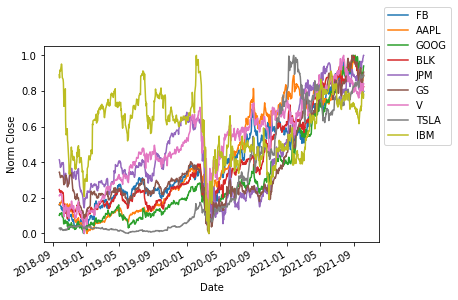

In [62]:
# create a normalized closing price column so we can prepare different stocks
grouper = all_data.groupby('Symbols')['Close']
maxes = grouper.transform('max')
mins = grouper.transform('min')
all_data['Norm Close'] = (all_data.Close - mins)/(maxes - mins)

# plot the closing price
closeplot = sns.lineplot(data=all_data, x='Date', y='Norm Close', hue='Symbols')
closeplot.get_figure().autofmt_xdate()
closeplot.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1);

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
AAPL,766.0,0.001491,0.022264,-0.128647,-0.008397,0.001539,0.012770,0.119808
BLK,766.0,0.000955,0.021075,-0.136546,-0.007835,0.001585,0.010481,0.135239
FB,766.0,0.001162,0.022784,-0.142530,-0.010239,0.001226,0.013337,0.108164
GOOG,766.0,0.001321,0.019209,-0.111008,-0.006389,0.002031,0.010158,0.104485
GS,766.0,0.000949,0.023122,-0.127053,-0.009653,0.000757,0.012258,0.175803
IBM,766.0,0.000121,0.019015,-0.128507,-0.007933,0.000749,0.008651,0.113011
JPM,766.0,0.000742,0.022401,-0.149649,-0.008765,0.000579,0.010036,0.180125
TSLA,766.0,0.004275,0.042784,-0.210628,-0.016537,0.002538,0.022431,0.198949
V,766.0,0.000753,0.019259,-0.135472,-0.007490,0.001394,0.009467,0.138426


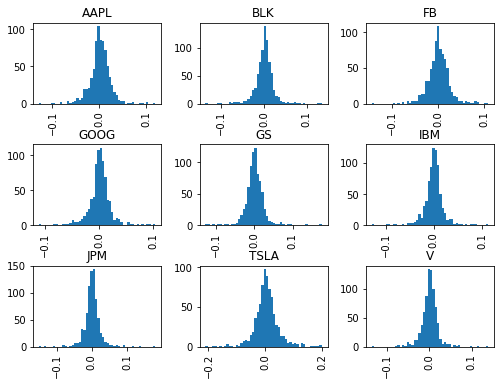

In [63]:
# Plot the distribution of 'Percentage Price Change'
all_data['Closing Price Pct Change'].hist(by=all_data['Symbols'], bins=50, figsize=(8,6))

# Pull up summary statistics table
all_data.groupby('Symbols')['Closing Price Pct Change'].describe()

### 3. Create some helper functions

In [64]:
def pct_change(buy, sell):
    return (sell - buy) / buy

In [65]:
def mean(value, n):
    return value / n

### 4. The Signal functions

#### A: Buy one share of each stock in the portfolio at the end of each month (AIP)

In [66]:
def signal_A(date, df):
    lastdays = list(all_data.groupby([pd.Grouper(key = 'Date', freq = 'M')])['Date'].last())
    if date in lastdays:
        return 'Buy'

#### B: Buy one share of a stock in the portfolio whenever the price falls more than a certain percentage in a single day

In [67]:
def signal_B(pct_change):
    if pct_change < -0.08: # choose your benchmark fall percentage
        return 'Buy'

### 5. Implement the strategies

In [68]:
# implement strategy A
mydate_A = []
mysymbols_A = []
mypctchange_A = []
myshares_A = []
mytotalshares_A = []
mybuyingprice_A = []
mytotalcost_A = []

for i, row in all_data.iterrows():
    if signal_A(row.Date, all_data) == 'Buy':
        mydate_A.append(row.Date)
        mysymbols_A.append(row.Symbols)
        mypctchange_A.append(row['Closing Price Pct Change'])
        myshares_A.append(1)
        mytotalshares_A.append(sum(myshares_A))
        mybuyingprice_A.append(row['Open'])
        mytotalcost_A.append(sum(mybuyingprice_A))

# create shares purchasing df A
mydf_A = pd.DataFrame({'Date': mydate_A,
                       'Symbols': mysymbols_A,
                       'Closing Price Pct Change': mypctchange_A,
                       'Daily Shares Bought': myshares_A,
                       'Total Shares': mytotalshares_A,
                       'Buying Price': mybuyingprice_A,
                       'Total Cost': mytotalcost_A})

In [69]:
# implement strategy B
mydate_B = []
mysymbols_B = []
mypctchange_B = []
myshares_B = []
mytotalshares_B = []
mybuyingprice_B = []
mytotalcost_B = []

for i, row in all_data.iterrows():
    if signal_B(row['Closing Price Pct Change']) == 'Buy':
        mydate_B.append(row.Date)
        mysymbols_B.append(row.Symbols)
        mypctchange_B.append(row['Closing Price Pct Change'])
        myshares_B.append(1)
        mytotalshares_B.append(sum(myshares_B))
        mybuyingprice_B.append(row['Open'])
        mytotalcost_B.append(sum(mybuyingprice_B))

# create shares purchasing df B
mydf_B = pd.DataFrame({'Date': mydate_B,
                       'Symbols': mysymbols_B,
                       'Closing Price Pct Change': mypctchange_B,
                       'Daily Shares Bought': myshares_B,
                       'Total Shares': mytotalshares_B,
                       'Buying Price': mybuyingprice_B,
                       'Total Cost': mytotalcost_B})

#### 6. Results

In [70]:
# overall performance evaluation

# A
myavgcost_A = mean(mytotalcost_A[-1], sum(myshares_A))

grpclose_A = all_data.groupby('Symbols')['Close']
weightedclose_A = grpclose_A.tail(1).sum() / len(tickers)
gainloss_A = pct_change(myavgcost_A, weightedclose_A)

print('Strategy A')
print('Total shares bought: ', sum(myshares_A))
print('Average cost: ', myavgcost_A)
print('Total cost:', mytotalcost_A[-1] * 8) # convert to your own currency, mop in this case
print('Gain/Loss pct: {}%'.format(round(gainloss_A*100, 2)))
print('\n')

# B
myavgcost_B = mean(mytotalcost_B[-1], sum(myshares_B))

grpclose_B = all_data.groupby('Symbols')['Close']
weightedclose_B = grpclose_B.tail(1).sum() / len(tickers)
gainloss_B = pct_change(myavgcost_B, weightedclose_B)

print('Strategy B')
print('Total shares bought: ', sum(myshares_B))
print('Average cost: ', myavgcost_B)
print('Total cost:', mytotalcost_B[-1] * 8) # convert to your own currency, MOP in this case
print('Gain/Loss pct: {}%'.format(round(gainloss_B*100, 2)))

Strategy A
Total shares bought:  342
Average cost:  389.80152276245474
Total cost: 1066496.9662780762
Gain/Loss pct: 66.48%


Strategy B
Total shares bought:  45
Average cost:  226.0025678846571
Total cost: 81360.92443847656
Gain/Loss pct: 187.14%


#### Bottom line:  In this backtesting, to buy the stocks only when their prices rapidly fall outperform the simplest AIP (to buy the stocks at the end of each month).

In [71]:
mydf_A

,Date,Symbols,Closing Price Pct Change,Daily Shares Bought,Total Shares,Buying Price,Total Cost
0,2018-09-28,FB,-0.025942,1,1,168.330002,168.330002
1,2018-09-28,AAPL,0.003512,1,2,56.197498,224.527500
2,2018-09-28,GOOG,-0.000979,1,3,1191.869995,1416.397495
3,2018-09-28,BLK,-0.013727,1,4,474.519989,1890.917484
4,2018-09-28,JPM,-0.014670,1,5,113.650002,2004.567486
...,...,...,...,...,...,...,...
337,2021-10-08,JPM,0.000764,1,338,170.020004,131752.270779
338,2021-10-08,GS,0.005606,1,339,390.829987,132143.100765
339,2021-10-08,V,-0.001214,1,340,231.000000,132374.100765
340,2021-10-08,TSLA,-0.010232,1,341,796.210022,133170.310787


In [72]:
mydf_B

,Date,Symbols,Closing Price Pct Change,Daily Shares Bought,Total Shares,Buying Price,Total Cost
0,2018-09-28,TSLA,-0.139015,1,1,54.051998,54.051998
1,2019-01-03,AAPL,-0.099607,1,2,35.994999,90.046997
2,2019-01-18,TSLA,-0.129711,1,3,64.599998,154.646996
3,2019-04-04,TSLA,-0.082348,1,4,52.377998,207.024994
4,2019-07-25,TSLA,-0.136137,1,5,46.700001,253.724995
5,2020-02-05,TSLA,-0.171758,1,6,164.651993,418.376987
6,2020-02-27,TSLA,-0.128146,1,7,146.000000,564.376987
7,2020-03-09,JPM,-0.135455,1,8,96.570000,660.946987
8,2020-03-09,GS,-0.103915,1,9,173.580002,834.526989
9,2020-03-09,TSLA,-0.135725,1,10,121.078003,955.604992
